The purpose of these notes was for me to get to know <a href="http://keras.io">Keras</a>, having previously used <a href="http://deeplearning.net/software/theano/">Theano</a> (which is messy) and <a href="http://torch.ch">Torch</a> (which is much nicer, but written in Lua).

The standard tutorials always seem to start with complicated multi-layer networks and image data sets, whereas it's perhaps important to start from the bottom up, with elementary models and synthetic data, in order to understand a little bit better what's going on.

# Linear regression

Let's start at the beginning. The simplest neural network model of all has one input unit, one output unit and no intermediate layers. It corresponds to a 1-dimensional linear regression:

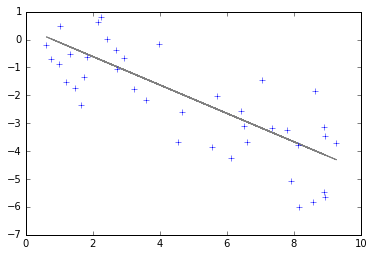

In [1]:
# set up some synthetic training data:

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

size = 40
sigma = 1.0
a = np.random.randn(1)
b = np.random.randn(1)

x = 10*np.random.random(size)
y = a + b*x + sigma * np.random.randn(size)

# and here's a picture:
plt.plot(x, a + b*x, c='grey')
plt.plot(x, y, 'b+')
plt.show()

Help for Keras is available locally, or see <tt>http://keras.io</tt>.

In [2]:
import keras
help(keras)

Help on package keras:

NAME
    keras

FILE
    /Developer/anaconda/lib/python2.7/site-packages/keras/__init__.py

PACKAGE CONTENTS
    activations
    backend (package)
    callbacks
    constraints
    datasets (package)
    initializations
    layers (package)
    models
    objectives
    optimizers
    preprocessing (package)
    regularizers
    utils (package)
    wrappers (package)

DATA
    __version__ = '0.3.2'

VERSION
    0.3.2




In this tutorial we'll stick with sequential models (i.e. feedforward networks) and stochastic gradient descent (SGD). We're using Tensorflow as the back end:

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


So here's the 'hello world' of neural network models (with no neurons!). Note that we can extract the network weights as a sequence of <tt>numpy</tt> arrays:

In [4]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='sgd')

# initially the model looks like:
print(model.get_weights())
print(model.get_weights()[0][0][0])
print(model.get_weights()[1][0])

[array([[ 1.05889952]], dtype=float32), array([ 0.], dtype=float32)]
1.0589
0.0


Now fit the model to the training data:

In [5]:
X_train = x.reshape(size,1)
Y_train = y.reshape(size,1)

model.fit(X_train, Y_train, 
          batch_size=10, 
          nb_epoch=5)

# after training the model looks like:
model.get_weights()

Epoch 1/5
40/40 [==============================] - 0s - loss: 19.7541     
Epoch 2/5
40/40 [==============================] - 0s - loss: 1.3455     
Epoch 3/5
40/40 [==============================] - 0s - loss: 1.3241     
Epoch 4/5
40/40 [==============================] - 0s - loss: 1.5229     
Epoch 5/5
40/40 [==============================] - 0s - loss: 1.4459     
[array([[-0.40757868]], dtype=float32), array([-0.20079905], dtype=float32)]


We can read off the regression line and plot it (red), compared with the original model (grey) from which the data was generated:

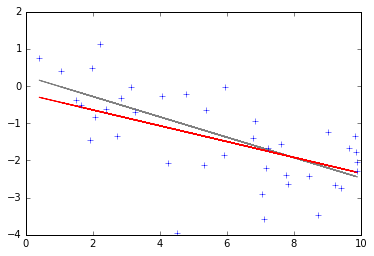

In [5]:
a_pred = model.get_weights()[1][0]
b_pred = model.get_weights()[0][0][0]

y_pred = a_pred + b_pred*x

plt.plot(x, a + b*x, c='grey')
plt.plot(x, y_pred, 'r')
plt.plot(x, y, 'b+')
plt.show()

# Logistic regression

The next example also has no hidden layer - just two input units and two output 'softmax' units. This is equivalent to a binary logistic regression in 2 dimensions. First we generate some training data:

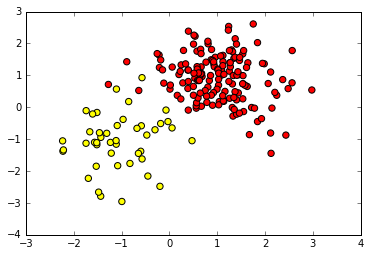

In [23]:
size = 200
prob = 0.8

y = np.zeros(size)
for i in range(size):
    if np.random.random(1) > prob: y[i] = 1

x = np.zeros([size,2])
a1 = -1; b1 = -1
a2 = 1; b2 = 1
sigma = 0.7

for i in range(size): 
    if y[i]==1: 
        x[i,0] = a1 + sigma*np.random.randn(1)
        x[i,1] = b1 + sigma*np.random.randn(1)
    else: 
        x[i,0] = a2 + sigma*np.random.randn(1)
        x[i,1] = b2 + sigma*np.random.randn(1)

plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap="autumn")
plt.show()

Tnen build and compile the model:

In [24]:
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(2, input_dim=2))
model.add(Activation("softmax"))
model.compile(loss='binary_crossentropy', optimizer='sgd')

# initially the model looks like:
model.get_weights()

[array([[ 0.15982123, -0.75464225],
        [-0.58402449, -0.99321949]], dtype=float32),
 array([ 0.,  0.], dtype=float32)]

This time, before fitting the model we'll set up a class which allows us to track the SGD loss history during the fitting:

In [25]:
from keras.callbacks import Callback

class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()

Now fit the model, passing 'history' as an argument:

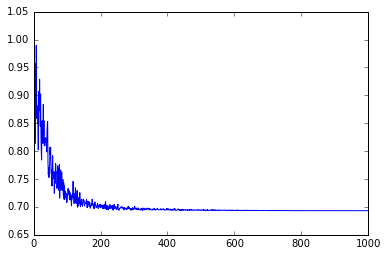

In [26]:
X_train = x.reshape(size,2)
Y_train = y.reshape(size,1)

model.fit(X_train, Y_train, 
          batch_size=10, 
          nb_epoch=50,
          verbose=1, 
          callbacks=[history])

# show the SGD progress:
plt.plot(history.losses)
plt.show()

And visualise the decision boundary, extracted from the learned weights:

[[-0.28629619 -0.30852541]
 [-0.7953124  -0.78193152]]
[-0.00794386  0.00794384]


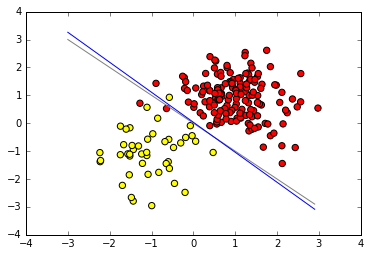

In [27]:
W = model.get_weights()[0]
b = model.get_weights()[1]
print(W)
print(b)
plt.scatter(x[:,0], x[:,1], c=y, s=40, cmap="autumn")
idx = np.arange(-3,3,0.1)

a = b[1] - b[0]
u = W[0,0] - W[1,0]
v = W[0,1] - W[1,1]
idy = (a - u*idx)/v  

plt.plot(idx, -idx, c='grey')
plt.plot(idx, idy, c='blue')
plt.show()

As before, grey is the decision boundary from which the data were generated; blue is the model fit.

# Multi-layer perceptron for an XOR-like data set

Here's an example that doesn't admit a simple linear model:

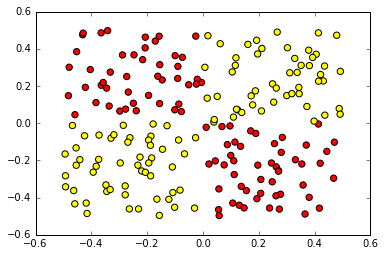

In [28]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

size = 200
x = np.zeros([size, 2])
y = np.zeros([size, 2])
for i in range(size):
    tmp = np.random.random(2) - 0.5
    x[i,:] = tmp
    if tmp[0]*tmp[1] > 0: y[i,0] = 1 
    else: y[i,1] = 1 

plt.scatter(x[:,0], x[:,1], c=y[:,0], s=40, cmap="autumn")
plt.show()    

We'll fit a neural network with 4 hidden units and tanh activation function:

In [29]:
from keras.layers import Dense, Activation, Dropout

nhidden = 4
model = Sequential()
model.add(Dense(nhidden, input_dim=2))
model.add(Activation("tanh"))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer='sgd')

# this model looks like:
model.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 2)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Dense (dense)                 (None, 4)                     12                  
Activation (activation)       (None, 4)                     0                   
Dense (dense)                 (None, 2)                     10                  
Activation (activation)       (None, 2)                     0                   
--------------------------------------------------------------------------------
Total params: 22
--------------------------------------------------------------------------------


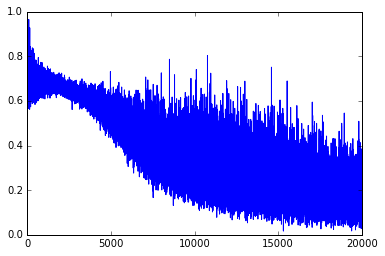

In [30]:
X_train = x.reshape(size,2)
Y_train = y.reshape(size,2)

history = LossHistory()
model.fit(X_train, Y_train, 
          batch_size=10, 
          nb_epoch=1000,
          verbose=0,
          callbacks=[history])

# show the SGD progress:
plt.plot(history.losses)
plt.show()

In this example we get a lot more variance in the SGD time series, and therefore in the resulting model performance. 

Let's generate a test set and visually examine the model predictions:

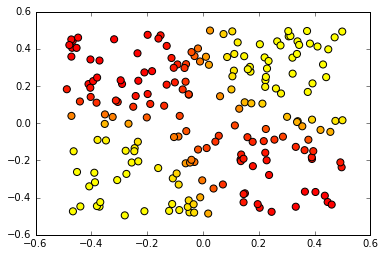

In [31]:
size = 200
x_test = np.random.random([size, 2]) - 0.5
y_test = model.predict(x_test)[:,0]

plt.scatter(x_test[:,0], x_test[:,1], c=y_test, s=50, cmap="autumn")
plt.show()    

# Non-linear regression (a cautionary example)

Next, let's try a simple nonlinear version of the linear regression example we started with. We'll use noisy quadratic data:

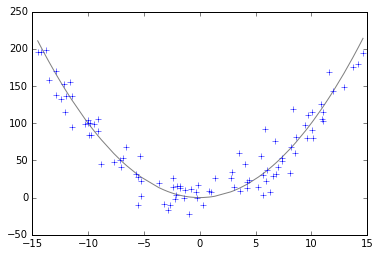

In [32]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

size = 100
sigma = 20
x = 30*(np.random.random(size) - 0.5)
x.sort()
y = pow(x,2) + sigma * np.random.randn(size)

plt.plot(x, pow(x,2), c='grey')
plt.plot(x, y, 'b+')
plt.show()

Before running to use Keras, note that it's easy to fit a 2-unit sigmoidal model 'by inspection':

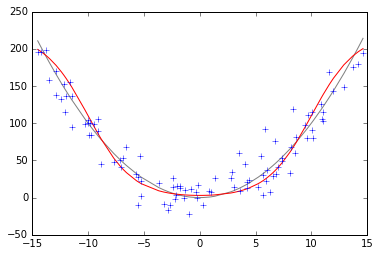

[array([[ 0.5,  0.5]]), array([-5,  5]), array([[ 220],
       [-220]]), array([220])]


In [33]:
from math import exp
def s(u): return 1/(1 + exp(-u))
def f(u): return 220*(1 + s((u-10)/2) - s((u+10)/2))

y_fitted = [f(u) for u in x]
plt.plot(x, pow(x,2), c='grey')
plt.plot(x, y_fitted, c='red')
plt.plot(x, y, 'b+')
plt.show()

# the corresponding weight array:
w0 = [ np.array([[0.5,0.5]]),
       np.array([-5, 5]),
       np.array([[220], [-220]]),
       np.array([220])]
print(w0)

Again, the generating model is shown in grey and the hand-written sigmoidal model in red.

So, knowing that 2 hidden units are sufficient, let's set up the Keras model:

In [34]:
from keras.layers import Dense, Activation

model = Sequential()
nhidden = 2
model.add(Dense(nhidden, input_dim=1))
model.add(Activation("sigmoid"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

# the model looks like:
model.summary()

--------------------------------------------------------------------------------
Initial input shape: (None, 1)
--------------------------------------------------------------------------------
Layer (name)                  Output Shape                  Param #             
--------------------------------------------------------------------------------
Dense (dense)                 (None, 2)                     4                   
Activation (activation)       (None, 2)                     0                   
Dense (dense)                 (None, 1)                     3                   
--------------------------------------------------------------------------------
Total params: 7
--------------------------------------------------------------------------------


Now attempt to fit it:

In [35]:
X_train = x.reshape(size,1)
Y_train = y.reshape(size,1)

model.fit(X_train, Y_train, 
          batch_size=10,
          nb_epoch=1000,
          verbose=0)

# after training the model looks like:
model.get_weights()

[array([[ -0.87568074,  12.26492977]], dtype=float32),
 array([-31.96626091, -24.66209984], dtype=float32),
 array([[ 31.57349205],
        [ 11.68243122]], dtype=float32),
 array([ 61.1827774], dtype=float32)]

However, plotting model predictions for the training points (red), compared with the actually values (blue) shows that in this case the model is a very poor fit: 

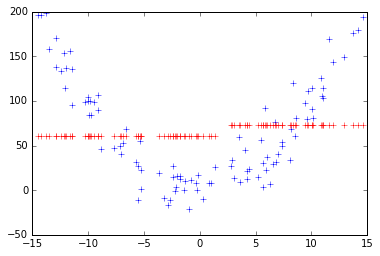

In [36]:
y_pred = model.predict(X_train)

plt.plot(x, y, 'b+')
plt.plot(x, y_pred[:,0], 'r+')
plt.show()

On the other hand, we can override the trained model by inserting our own weights as found earlier:

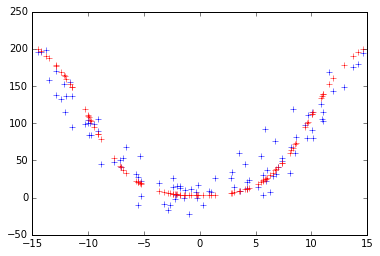

In [37]:
model.set_weights(w0)
y_pred = model.predict(X_train)

plt.plot(x, y, 'b+')
plt.plot(x, y_pred[:,0], 'r+')
plt.show()

So this example is instructive. In order for the optimisation to find the right model without our help, we need to control it more carefully. Let's look at this next.

# SGD optimisation in more detail

Let's look more closely at the SGD options:

<tt>keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)</tt>

Arguments:

- <tt>lr</tt>: float >= 0. Learning rate.
- <tt>momentum</tt>: float >= 0. Parameter updates momentum.
- <tt>decay</tt>: float >= 0. Learning rate decay over each update.
- <tt>nesterov</tt>: boolean. Whether to apply Nesterov momentum.

A good reference explaining these parameters is the paper by I. Sutskever, J. Martens, G. Dahl, G. Hinton, <a href="http://www.cs.utoronto.ca/~ilya/pubs/2013/1051_2.pdf">On the importance of initialization and momentum in deep learning</a>, 2013.

In our example we can benefit from the use of Mesterov momentum -- but it seems (by trial and error) that we are also dependent simply upon more training data and many SGD iterations to come close to the optimal solution that we know is there:

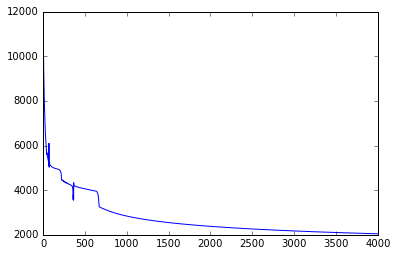

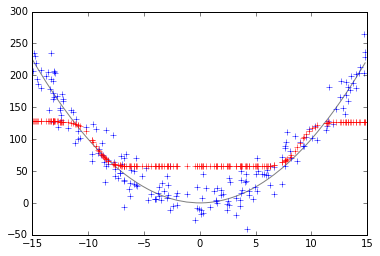

In [21]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.callbacks import Callback

# set up data:
size = 200
sigma = 20
x = 30*(np.random.random(size) - 0.5)
x.sort()
y = pow(x,2) + sigma * np.random.randn(size)

# build model:
model = Sequential()
nhidden = 2
model.add(Dense(nhidden, input_dim=1))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.01, decay=0.01, nesterov=True))

# fit model to data:
X_train = x.reshape(size,1)
Y_train = y.reshape(size,1)
history = LossHistory()
model.fit(X_train, Y_train, 
          batch_size=size, 
          nb_epoch=4000,
          verbose=0, 
          callbacks=[history])

# plot the loss sequence
plt.plot(history.losses)
plt.show()

# ... and the model performance: 
y_pred = model.predict(X_train)
plt.plot(x, pow(x,2), c='grey')
plt.plot(x, y, 'b+')
plt.plot(x, y_pred[:,0], 'r+')
plt.show()

So what's the moral of this last example? What it illustrates is that neural networks are a trade-off. Nonlinear regression is what they're good at - with enough work. Neural networks are general-purpose and convenient - they can be applied to many problems with little thought. But the price that comes with that is that they can also be extremely inefficient to train.